In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [33]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/FSDSRegression/main/notebooks/data/gemstone.csv')
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [34]:
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  object 
 2   color    193573 non-null  object 
 3   clarity  193573 non-null  object 
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 14.8+ MB


In [36]:
df.duplicated().sum()

0

In [37]:
## seggregate numerical and categorical columns
numerical_col = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_col

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [38]:
categorical_col = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_col

['cut', 'color', 'clarity']

In [39]:
df[categorical_col].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [40]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [41]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

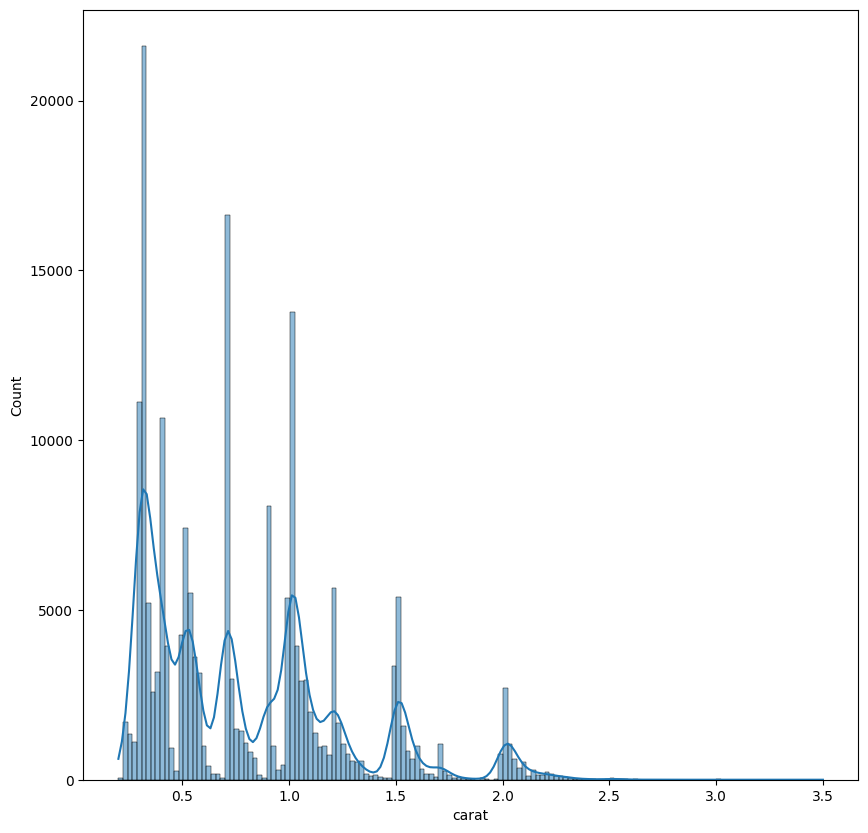

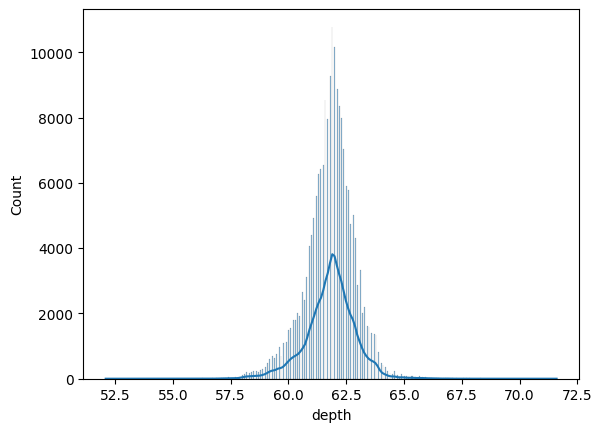

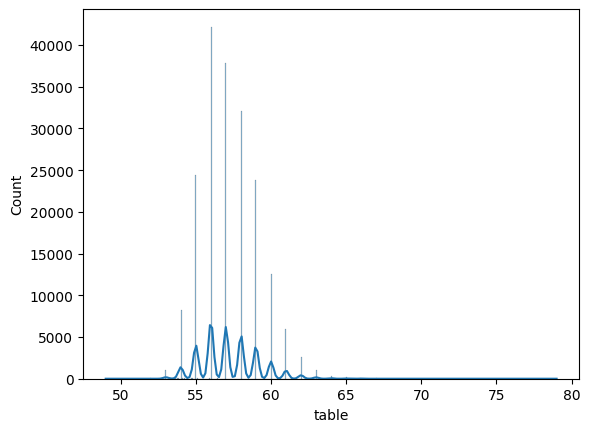

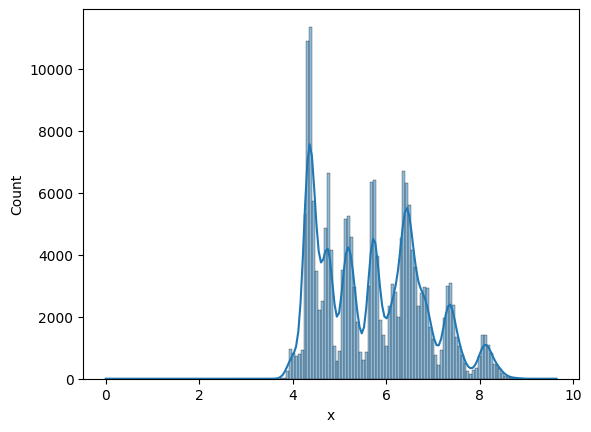

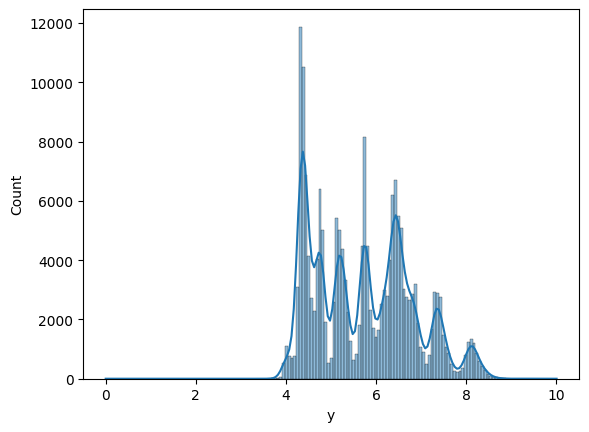

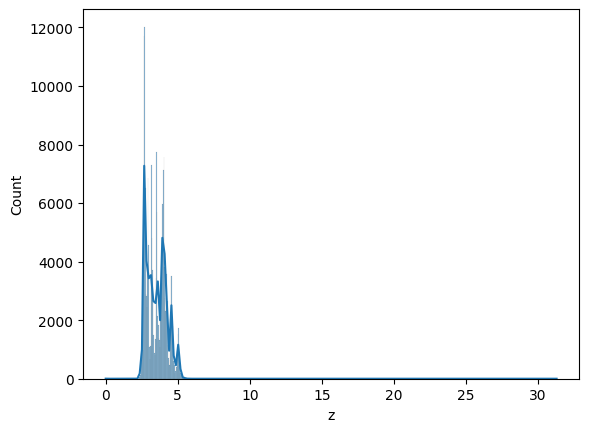

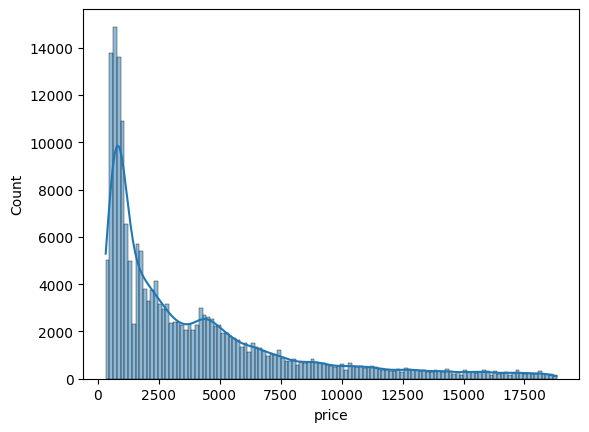

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
x=1
for i in numerical_col:
    sns.histplot(data= df,x=i,kde=True)
    print('\n')
    plt.show()

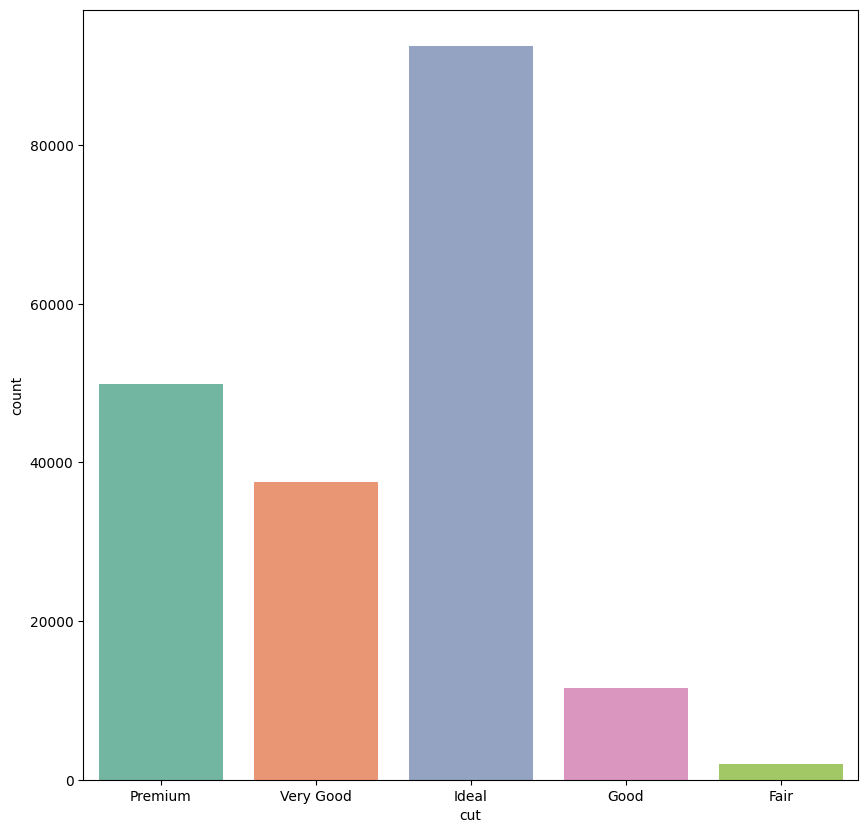

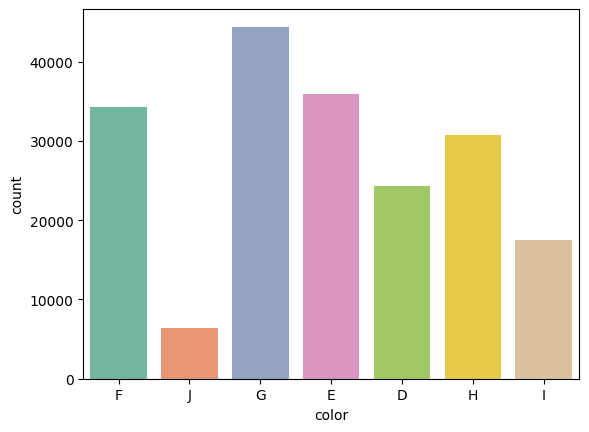

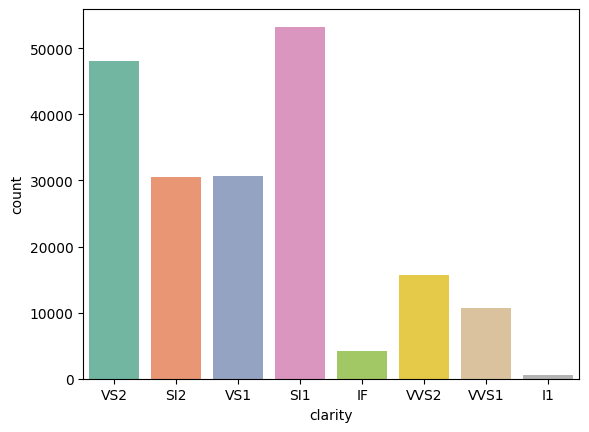

In [43]:
## categorical plot - countplot
plt.figure(figsize=(10,10))
x=1
for i in categorical_col:
    sns.countplot(x=df[i],palette='Set2')
    print('\n')
    plt.show()

<Axes: >

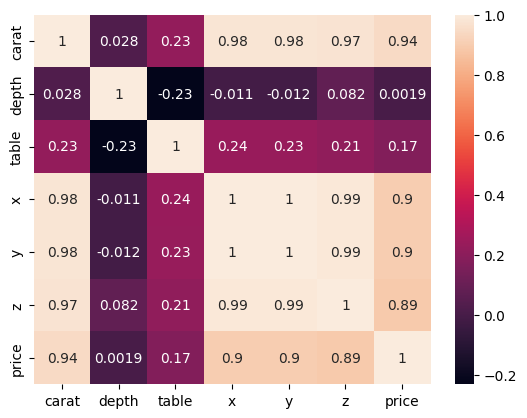

In [44]:
##correlation
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Currently we will not drop the highly correlated columns x,y,xz

In [45]:
df_samp=df.sample(10000)
df_samp.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
184299,0.30,Good,E,SI1,63.1,54.0,4.31,4.34,2.73,526
47695,0.70,Ideal,F,SI1,61.1,55.0,5.73,5.78,3.51,2805
121435,0.33,Ideal,G,IF,60.5,57.0,4.48,4.52,2.73,886
180500,1.01,Premium,G,VS2,62.1,59.0,6.44,6.37,3.98,6108
74755,1.02,Good,J,VS1,64.0,57.0,6.38,6.28,4.05,3656


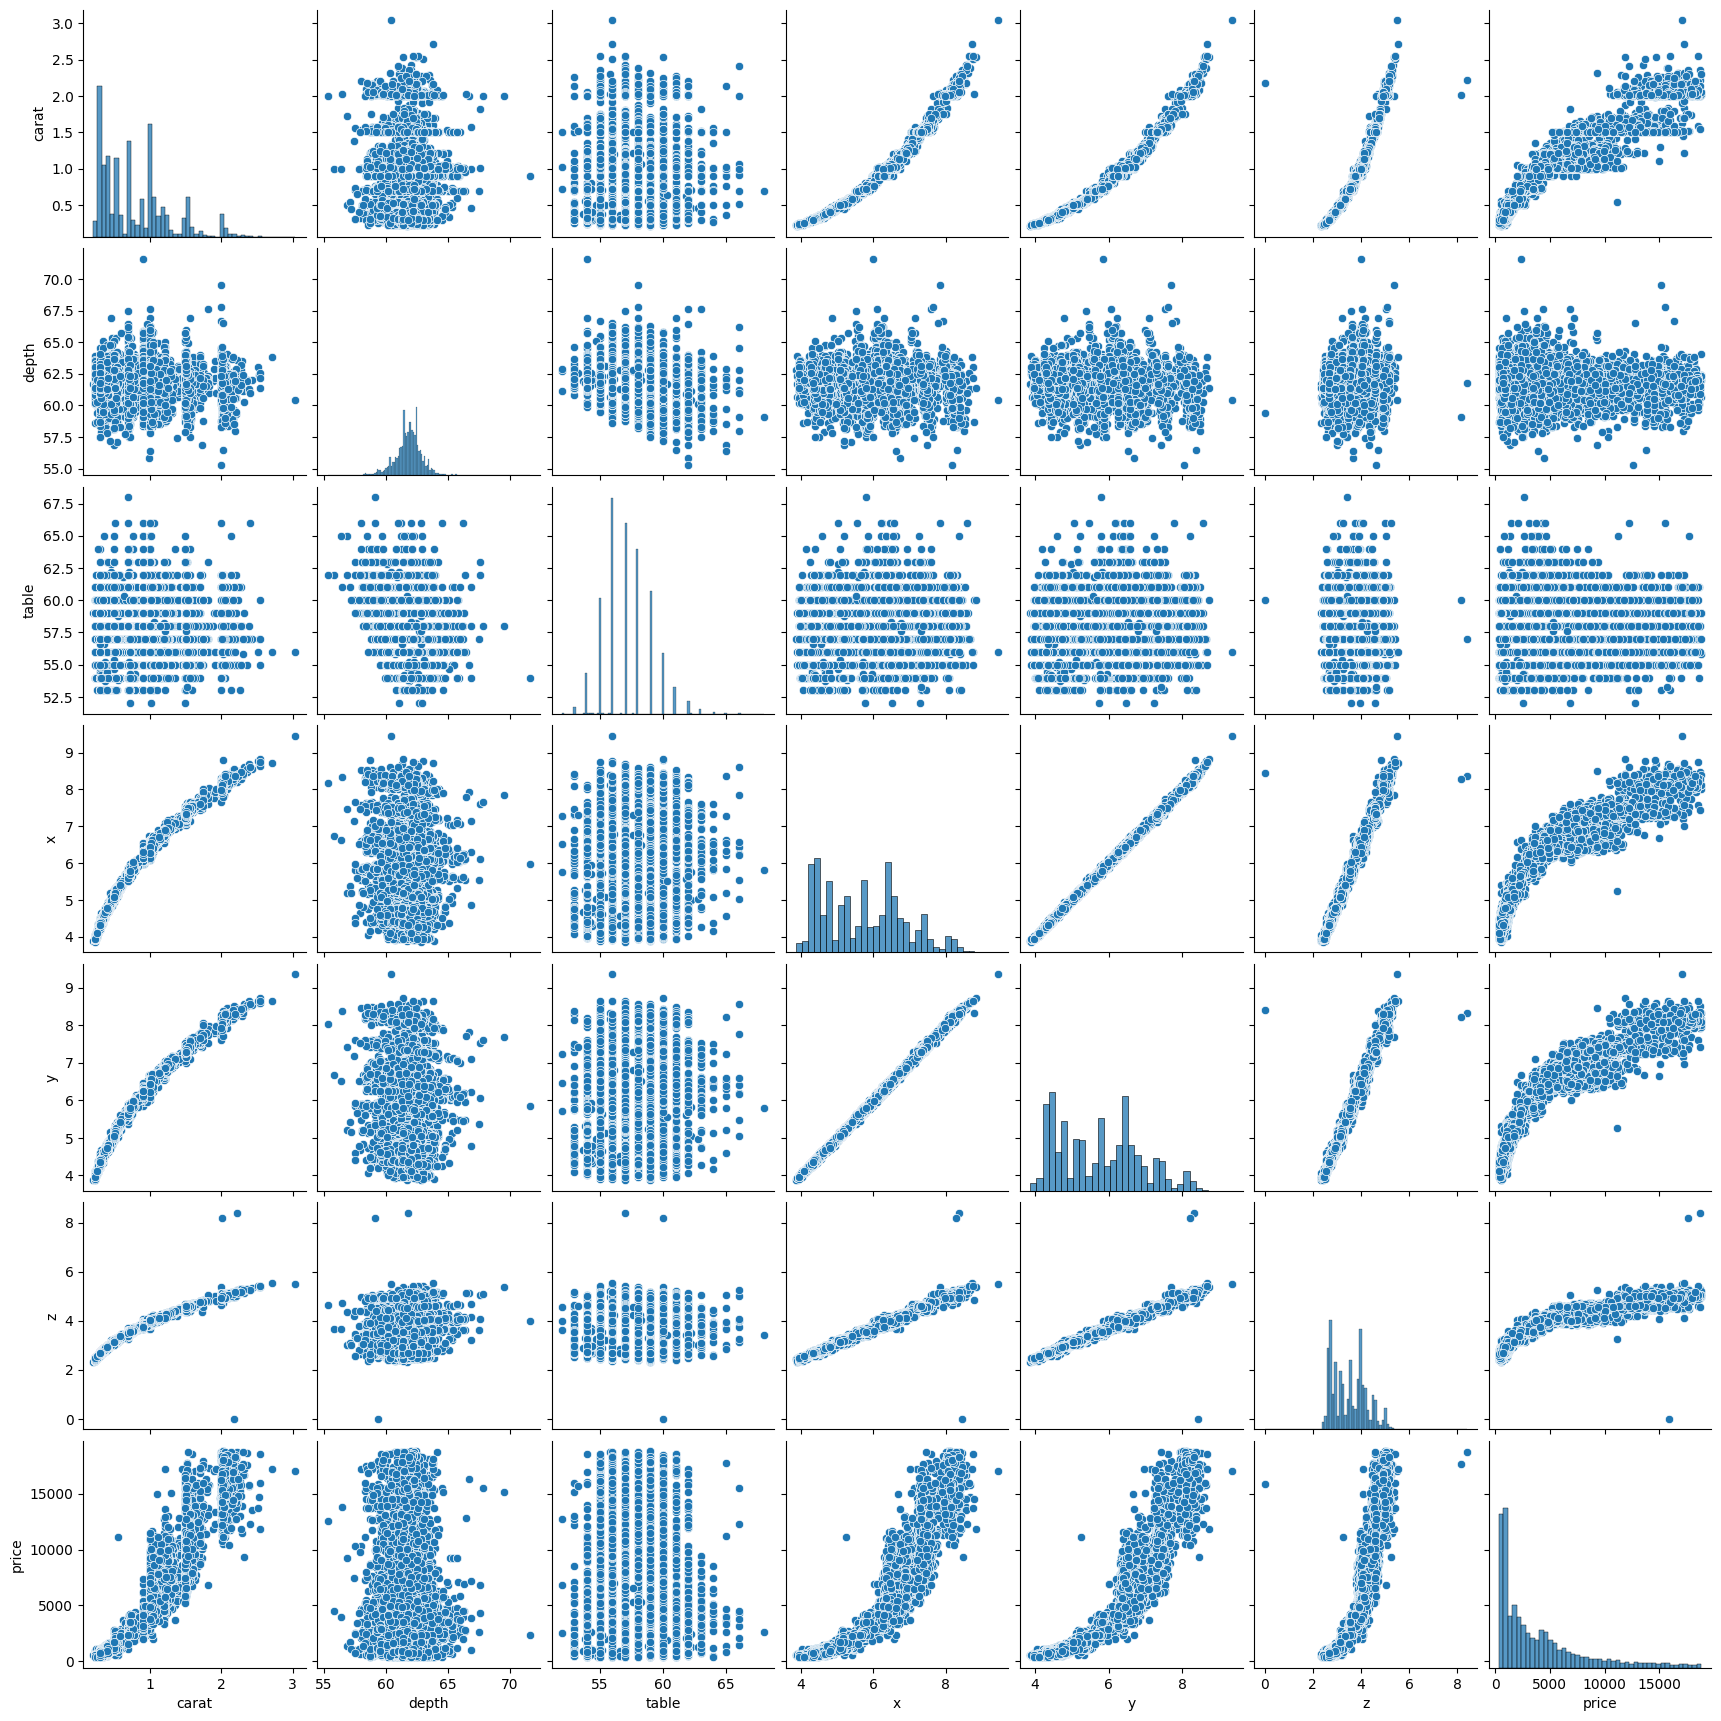

In [46]:
sns.pairplot(df_samp)

In [27]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [47]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [48]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
